In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Columns of the dataset
link to dowload the data: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HousingPrediction/data/melb_data.csv", parse_dates = ["Date"])
df

<ipython-input-2-eddbd9ca04ec>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("/content/drive/MyDrive/HousingPrediction/data/melb_data.csv", parse_dates = ["Date"])


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# Check the info or the data type of every columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#  Check if there are null values.

In [ ]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# Visualizng all of the columns that have missing values to make a strategy on how to clean them.

a

Text(0, 0.5, 'Count')

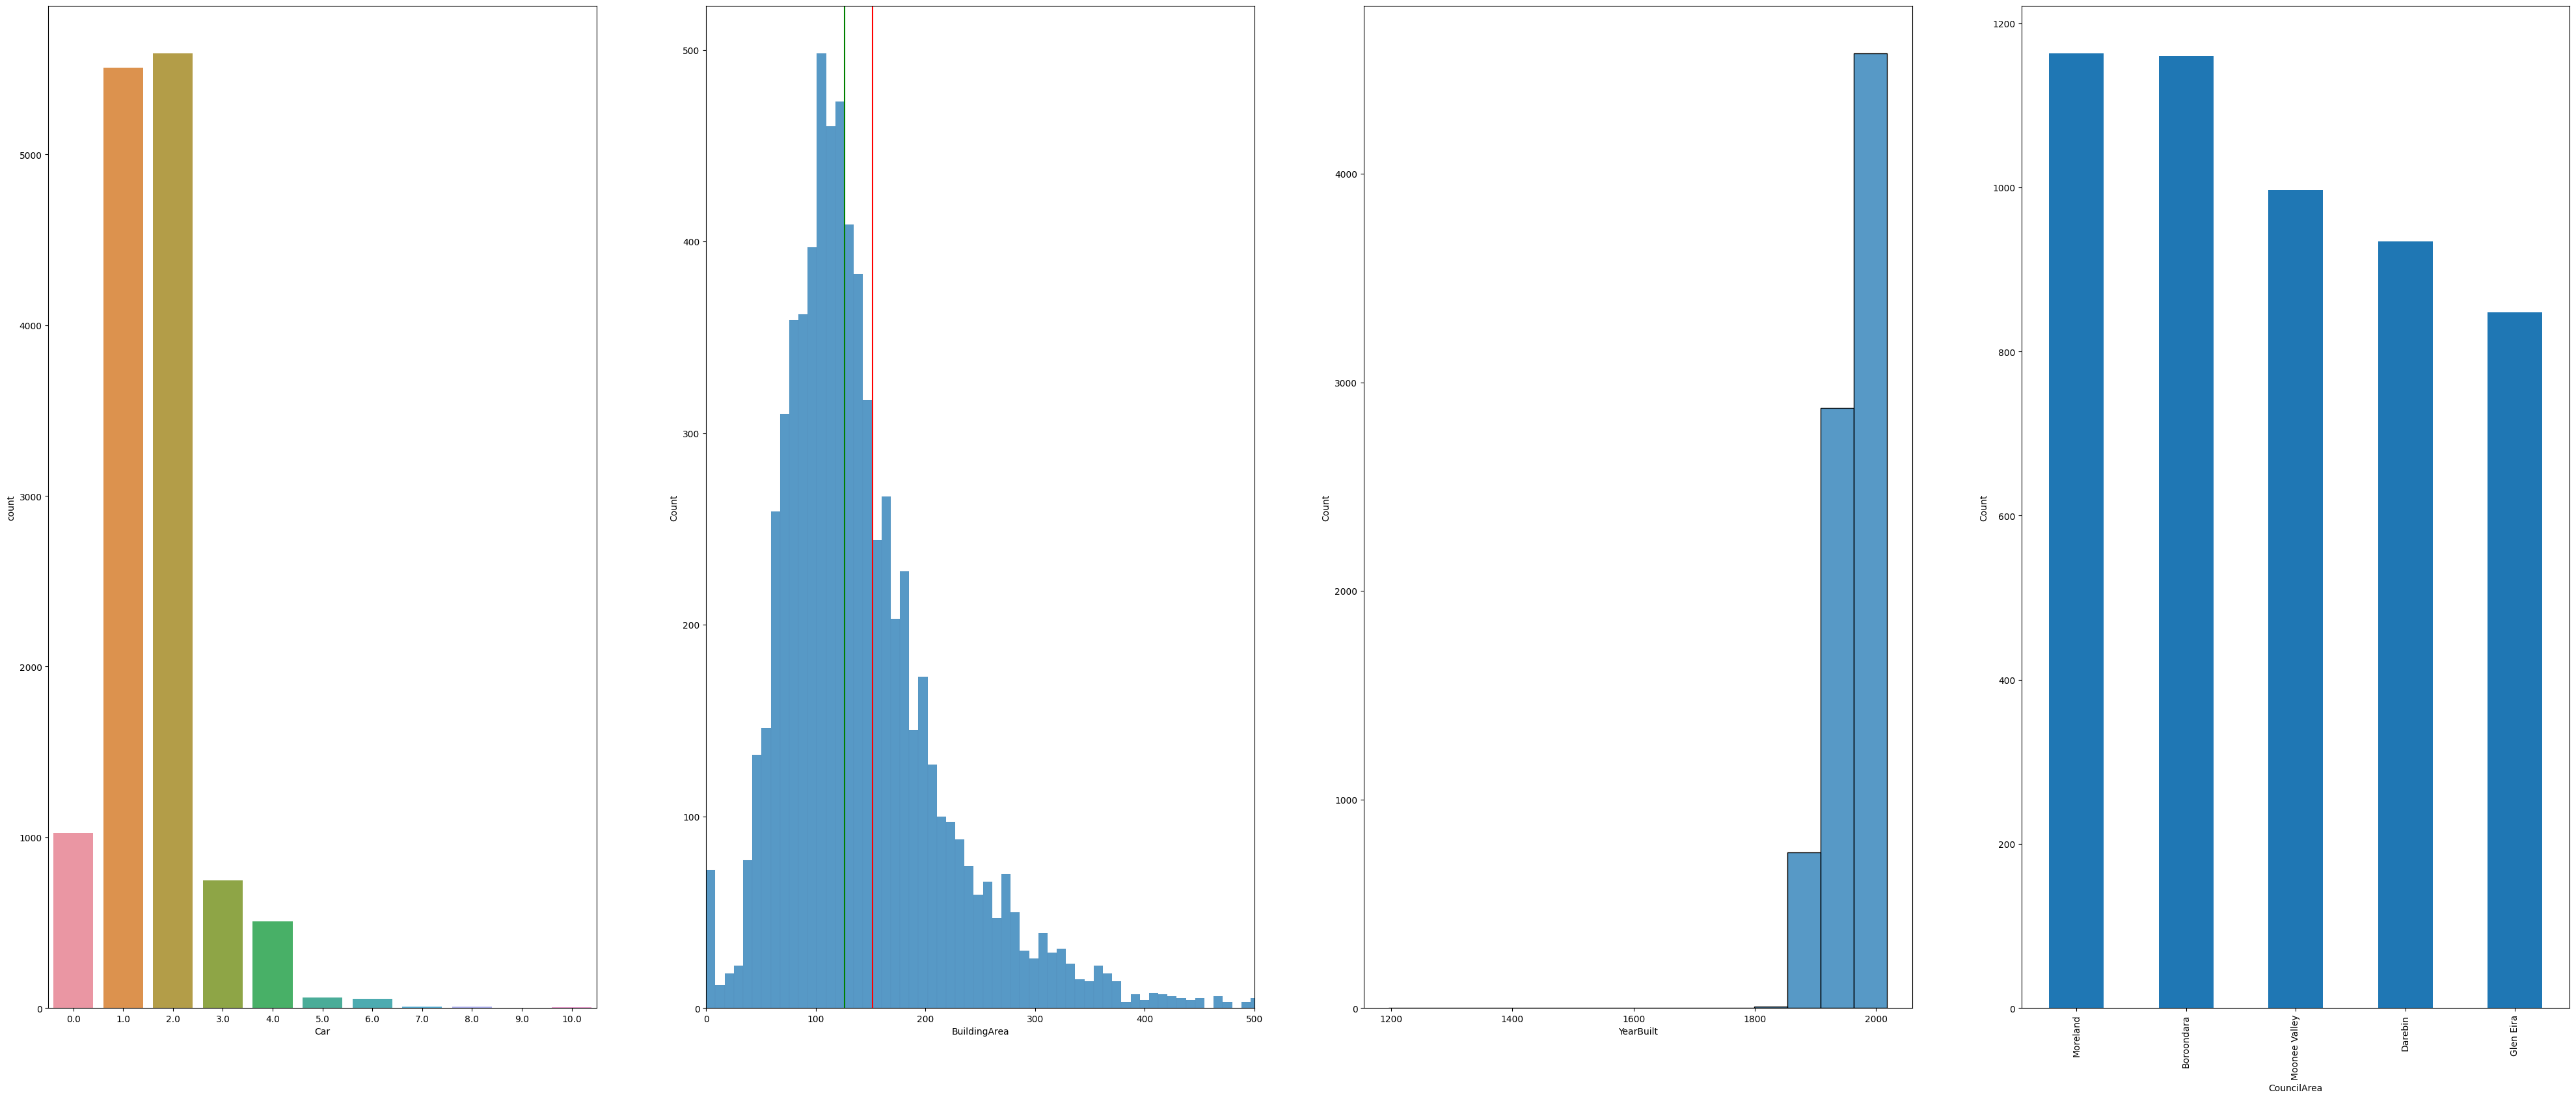

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (50,20))
ax1 = sns.countplot(data = df, x = "Car", ax = axes[0])
ax2 = sns.histplot(data = df, x = "BuildingArea", ax = axes[1])
ax2.set_xlim([0, 500])
ax2.axvline(df.BuildingArea.mean(), color = "red")
ax2.axvline(df.BuildingArea.median(), color = "green")
ax3 = sns.histplot(data = df, x = "YearBuilt", bins =15, ax = axes[2])
ax4 = df.CouncilArea.value_counts().head().plot(kind = "bar", ax = axes[3])
ax4.set_xlabel("CouncilArea")
ax4.set_ylabel("Count")

# Creating this graph can help us to clean our data more easily.
 - Fill all the missing data of column car by 3 since it has the highest count.
 - Use the median value of the building area because it's more centralized that the mean value.
 - We can change every null value of Built Year column into 0, however we're going to deal with this later.
 - Change all the missing value of Council Area to unknown since it's categorical.

In [ ]:
df["Car"].fillna(3, inplace = True)
df["BuildingArea"].fillna(df["BuildingArea"].median(), inplace = True)
df["CouncilArea"].fillna("Unknown", inplace = True)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,4.0,2.0,2.0,652.0,126.0,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,126.0,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
# And now we only have missing values on the YearBuilt
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# Feauture Engineering
We're going to preprocecss and manipulate our data to maximize it's performance.

In [ ]:
# Adding the Address Type column
list1 = df.Address.to_list()
list1 = [i.split(" ")[2] for i in list1]
df["Address Type"] = list1
other_list = (df["Address Type"].value_counts().tail(80-4).to_dict().keys())
df.loc[df["Address Type"].isin(other_list), "Address Type"] = "Other"

# Seperating the year, month, and date.
df["YrSold"] = df["Date"].dt.year
df["MonthSold"] = df["Date"].dt.month
df["DaySold"] = df['Date'].dt.day

# Changing all the Agent who sold 50 to lessthan50 value
count_sell = df["SellerG"].value_counts().reset_index()
list2 = count_sell[count_sell["SellerG"] < 50]["index"].to_list()
df.loc[df["SellerG"].isin(list2), "SellerG"] = "Lessthan50"

# Adding Regionname_2
list3 = [i.split(" ")[0] for i in df["Regionname"].to_list()]
df["Regionname"] = list3

# Changing an individual Suburb who has a count of less than 50 to lessthan50
count_sell = df["Suburb"].value_counts().reset_index()
list2 = count_sell[count_sell["Suburb"] < 50]["index"].to_list()
df.loc[df["Suburb"].isin(list2), "Suburb"] = "Lessthan50"

#Remove the unecessary column
df.drop(labels = ["Address", "Date"], axis = 1, inplace = True)

In [ ]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Address Type,YrSold,MonthSold,DaySold
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,NaN,Yarra,-37.79960,144.99840,Northern,4019.0,St,2016,3,12
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern,4019.0,St,2016,4,2
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern,4019.0,St,2017,4,3
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,NaN,Yarra,-37.79690,144.99690,Northern,4019.0,La,2017,4,3
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern,4019.0,St,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,126.0,1981.0,Unknown,-37.90562,145.16761,South-Eastern,7392.0,Cr,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western,6380.0,Dr,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,126.0,1997.0,Unknown,-37.85274,144.88738,Western,6380.0,St,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western,6380.0,St,2017,8,26


# Let's start visualizing the data now.

Text(0.5, 0.98, "Price of the house based on ['YrSold', 'MonthSold', 'DaySold', 'Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Address Type']")

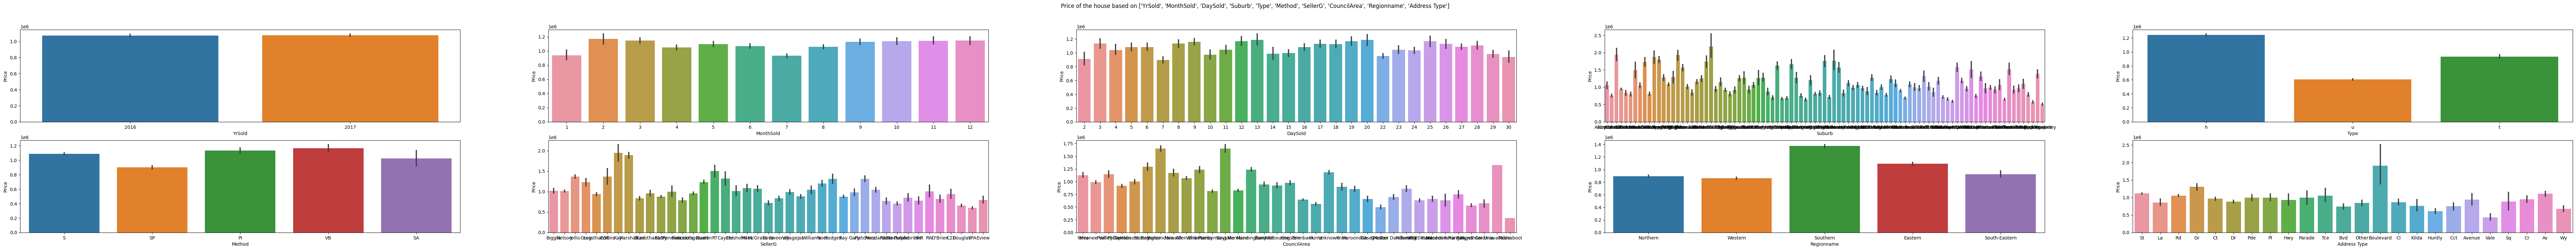

In [ ]:
categorical_columns = ["YrSold", "MonthSold", "DaySold"]
for col, row in df.items():
  if pd.api.types.is_object_dtype(df[col]):
    categorical_columns.append(col)
fig, axes = plt.subplots(2,5, figsize = (100,8))
col = 0
row = 0
for i in categorical_columns:
  sns.barplot(data = df, x = i, y = "Price", ax = axes[row, col])
  col += 1
  if col == 5:
    row += 1
    col = 0
plt.suptitle(f"Price of the house based on {categorical_columns}")


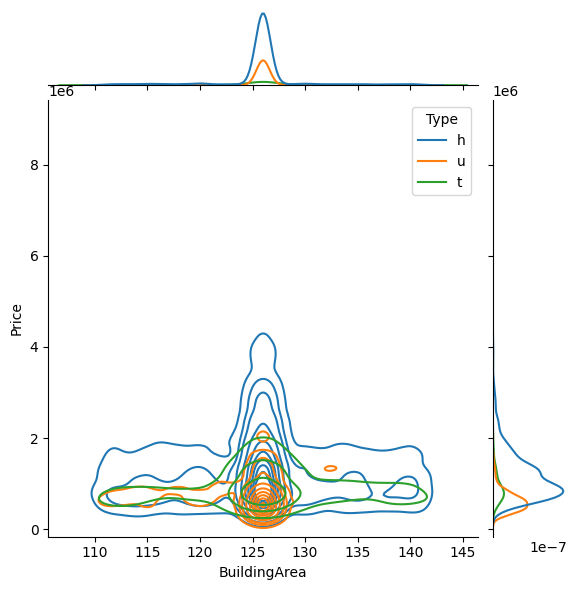

In [ ]:
# We need to remove the outilers in order to visualize it easily.
per25, per75 = np.percentile(df["BuildingArea"], [25, 75])
low_out =  per25 - 1.5*(per75 - per25)
high_out = per75 + 1.5*(per75 - per25)
df_noliers = df.loc[(df["BuildingArea"] > low_out) & (df["BuildingArea"] < high_out)]
sns.jointplot(data = df_noliers, x = "BuildingArea", y = "Price", kind = "kde", hue = "Type")


(0.0, 2000.0)

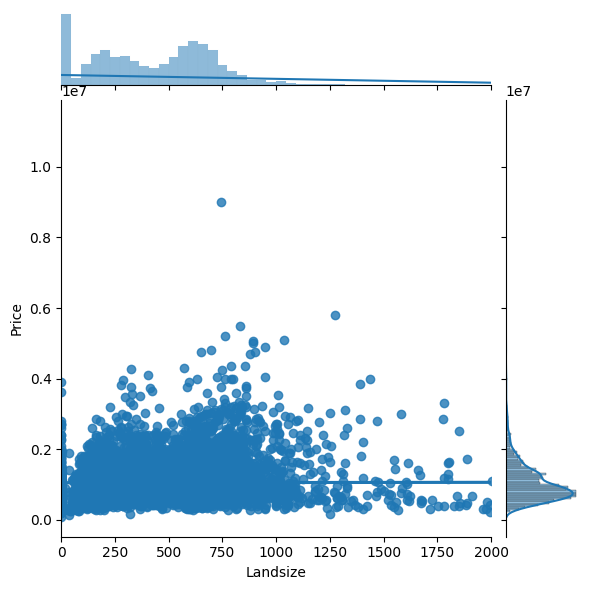

In [ ]:
sns.jointplot(data = df_noliers, x = "Landsize", y = "Price", kind = "reg")
plt.xlim([0, 2000])

# I'm going to check if the Landsize and the BuildingArea correlates with each other, because by doing this we can remove either of the column since it shows redundancy.

In [ ]:
from scipy.stats.stats import pearsonr
correlation_1 = pearsonr(df["BuildingArea"], df["Landsize"])
correlation_1
# It doesn't show redundancy

<ipython-input-131-7dc33077e66f>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.009509215770100552, pvalue=0.267887509647698)

# I'm also going to look if the Land Size and Building Area correlates with the dependdent variable.

In [ ]:
correlation_build = pearsonr(df["BuildingArea"], df["Price"])
correlation_size = pearsonr(df["Landsize"], df["Price"])
# Now the land size does not correlates with the price therefore we can remove it.

(PearsonRResult(statistic=0.2763278101007684, pvalue=1.79034332786352e-236),
 PearsonRResult(statistic=0.037322980936531996, pvalue=1.3613554541241435e-05))

In [ ]:
df.drop("Landsize", axis = 1, inplace = True)

# We're going to examine what year, month and days sold the most houses using lineplot.

Text(0.5, 0.98, 'Avg Price Sold per year, month, and day')

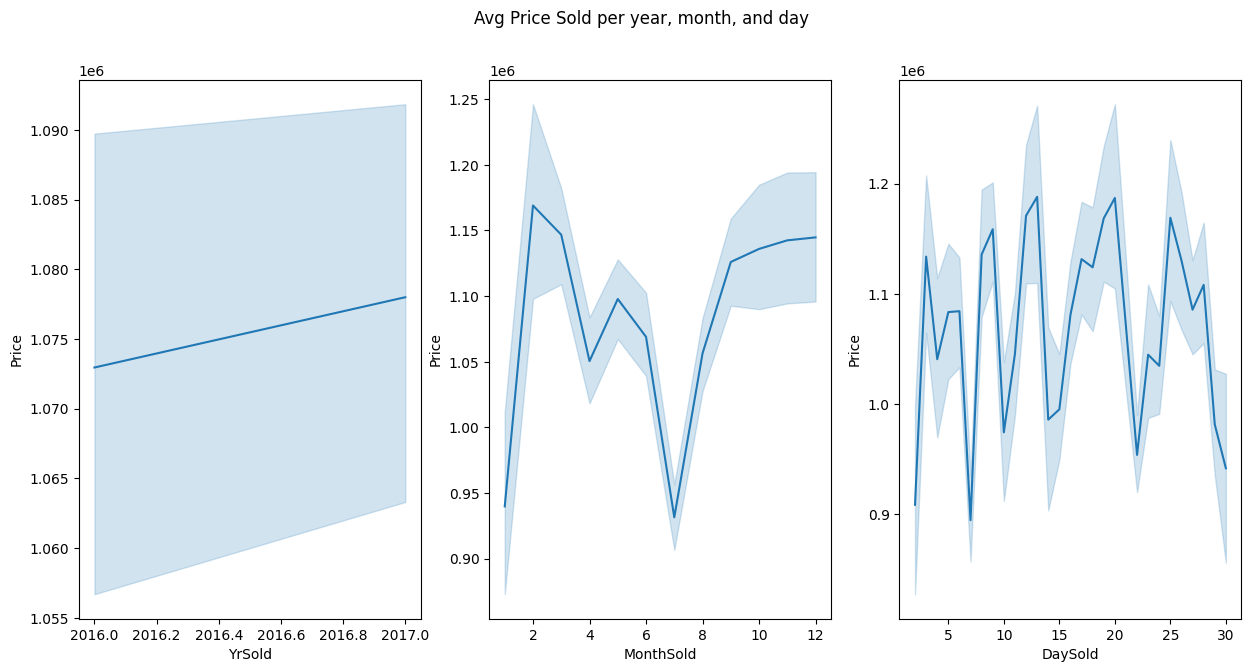

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15, 7))

date_category = ["YrSold", "MonthSold", "DaySold"]
sns.lineplot(data = df, x = "YrSold", y = "Price", ax = axes[0])
sns.lineplot(data = df, x = "MonthSold", y = "Price", ax = axes[1])
sns.lineplot(data = df, x = "DaySold", y = "Price", ax = axes[2])
plt.suptitle("Avg Price Sold per year, month, and day")

Text(0.5, 0.98, 'Avg Price Sold per year, month, and day based on it Region')

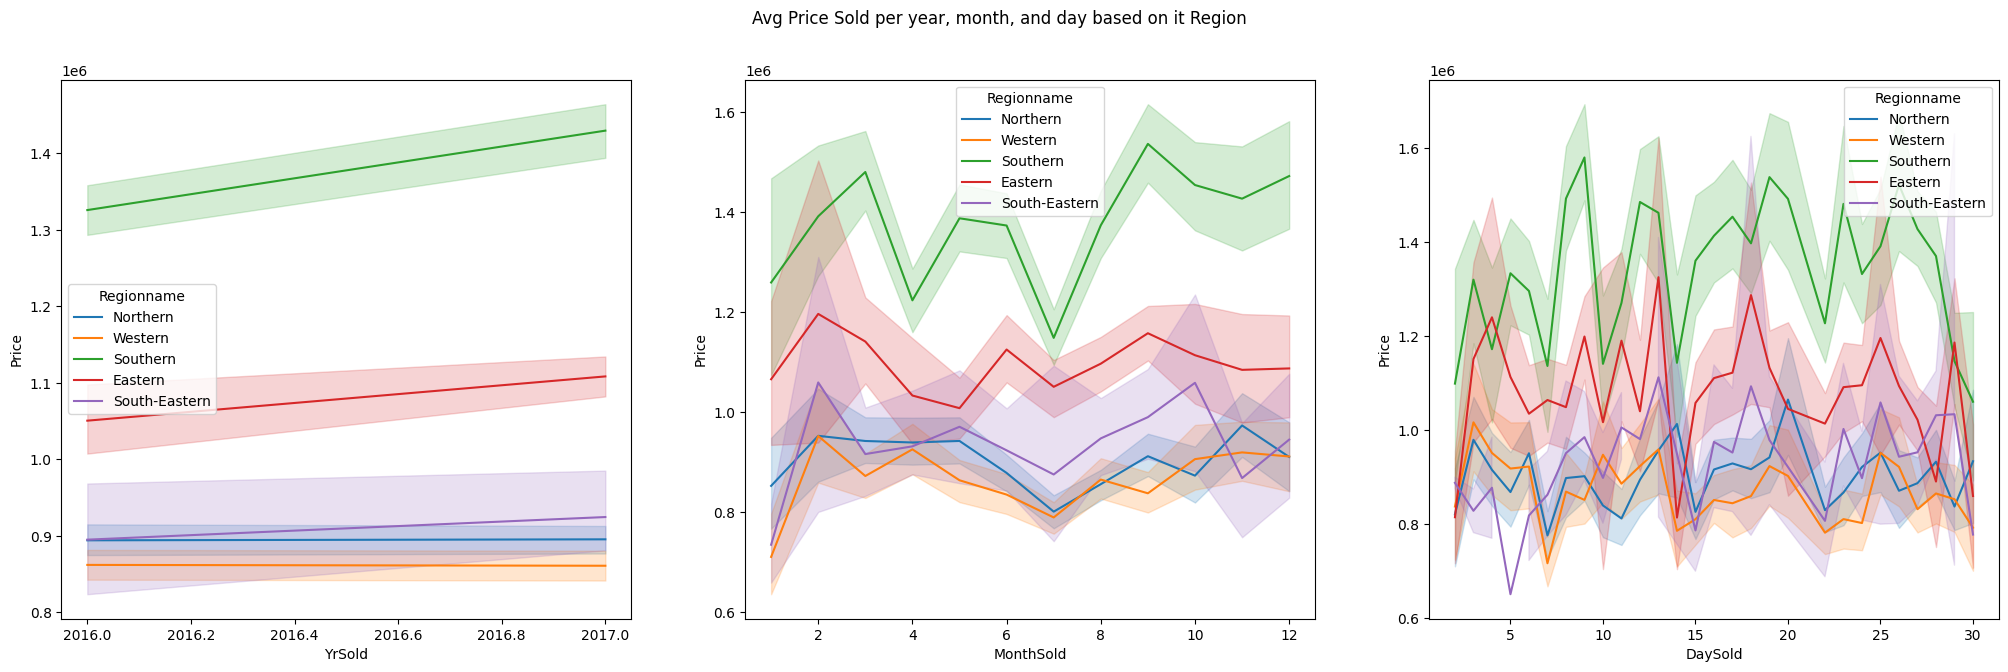

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (25, 7))
sns.lineplot(data = df, x = "YrSold", y = "Price", ax = axes[0], hue = "Regionname")
sns.lineplot(data = df, x = "MonthSold", y = "Price", ax = axes[1], hue = "Regionname")
sns.lineplot(data = df, x = "DaySold", y = "Price", ax = axes[2], hue = "Regionname")
plt.suptitle("Avg Price Sold per year, month, and day based on it Region")

# Scatter plot between the distance from CBD and the price of the house.

Text(0.5, 0.98, 'Price of the house per Distance from CBD')

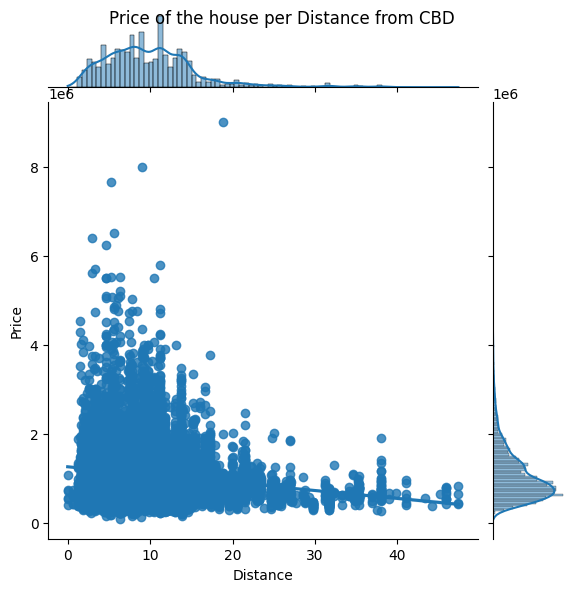

In [ ]:
sns.jointplot(data = df, x = "Distance", y="Price", kind = "reg")
plt.suptitle("Price of the house per Distance from CBD")

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Distance', ylabel='Price'>

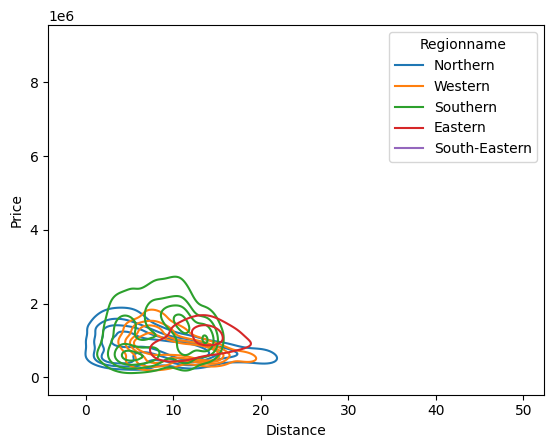

In [ ]:
sns.kdeplot(data =df , x = "Distance", y = "Price", hue = "Regionname", thresh=.2, levels=5, cmap="mako")

# Creating a pointplot to differentiate the average price between suburbs and the seller agent.

<Axes: xlabel='SellerG', ylabel='Price'>

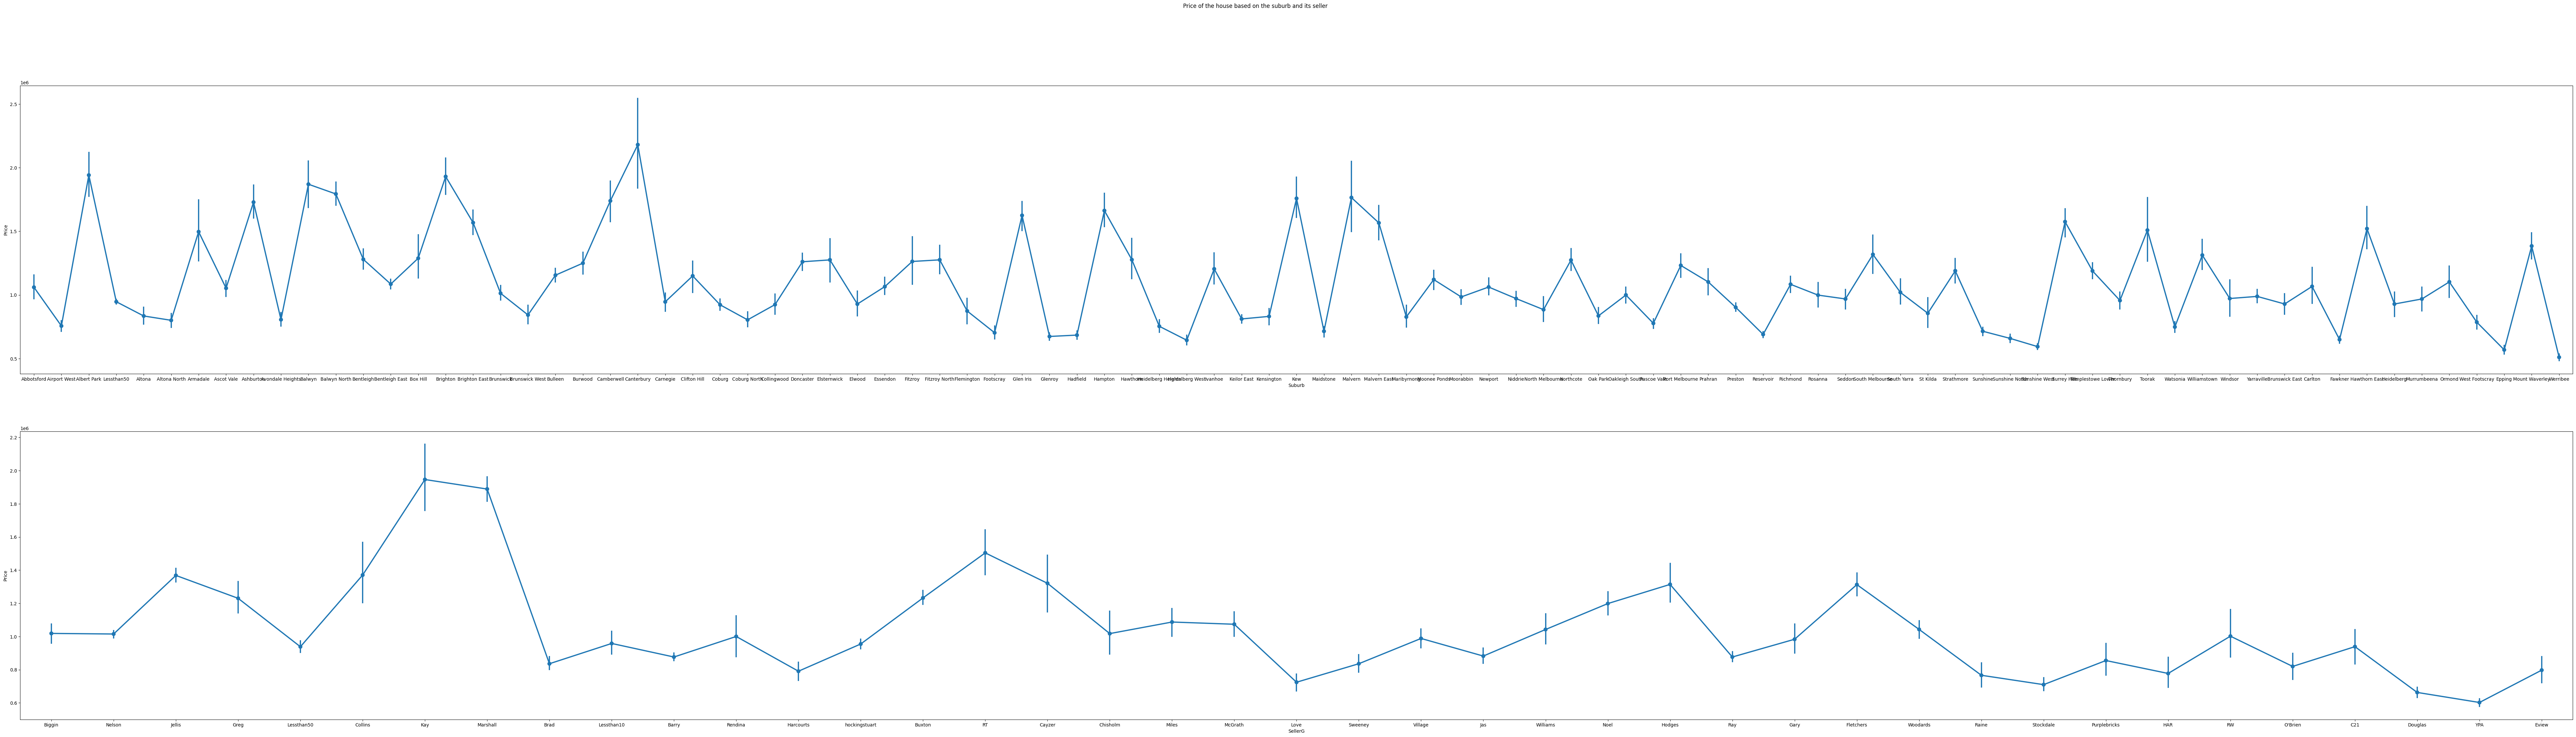

In [ ]:
fig, axes = plt.subplots(2,1,figsize = (100, 25))
plt.suptitle("Price of the house based on the suburb and its seller")
sns.pointplot(data = df, x = "Suburb", y = "Price", ax = axes[0])
sns.pointplot(data = df, x = "SellerG", y = "Price", ax = axes[1])

In [ ]:
sns.pairplot(data = df)

Output hidden; open in https://colab.research.google.com to view.

# Preparing our model for our machine learning. I'm going to use RandomForestRegressor and AdaBoostRegressor to check who predicts better.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


# But first I need to preporcess the data and seperate the train data from the test data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13577 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13577 non-null  object 
 1   Rooms          13577 non-null  int64  
 2   Type           13577 non-null  object 
 3   Price          13577 non-null  float64
 4   Method         13577 non-null  object 
 5   SellerG        13577 non-null  object 
 6   Distance       13577 non-null  float64
 7   Postcode       13577 non-null  float64
 8   Bedroom2       13577 non-null  float64
 9   Bathroom       13577 non-null  float64
 10  Car            13577 non-null  float64
 11  BuildingArea   13577 non-null  float64
 12  YearBuilt      8204 non-null   float64
 13  CouncilArea    13577 non-null  object 
 14  Lattitude      13577 non-null  float64
 15  Longtitude     13577 non-null  float64
 16  Regionname     13577 non-null  object 
 17  Propertycount  13577 non-null  float64
 18  Addres

In [ ]:
# The YearBuilt has some null values so I'm going to clean it now.
df = pd.read_csv("/content/drive/MyDrive/HousingPrediction/data/updated_csv.csv", index_col=0)
df["MissingValues"] = pd.isna(df["YearBuilt"])
df.loc[df["YearBuilt"].isna(), "YearBuilt"] = 0
df
df_tol = df.copy()
for col,row in df_tol.items():
  if pd.api.types.is_object_dtype(df_tol[col]):
    df_tol[col] = df_tol[col].astype("category")
df_tol

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Address Type,YrSold,MonthSold,DaySold,MissingValues
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,Yarra,-37.79960,144.99840,Northern,4019.0,St,2016,3,12,False
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern,4019.0,St,2016,4,2,False
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern,4019.0,St,2017,4,3,False
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,126.0,0.0,Yarra,-37.79690,144.99690,Northern,4019.0,La,2017,4,3,False
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern,4019.0,St,2016,4,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Lessthan50,4,h,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,126.0,1981.0,Unknown,-37.90562,145.16761,South-Eastern,7392.0,Cr,2017,8,26,False
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western,6380.0,Dr,2017,8,26,False
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,126.0,1997.0,Unknown,-37.85274,144.88738,Western,6380.0,St,2017,8,26,False
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western,6380.0,St,2017,8,26,False


In [ ]:
for col, row in df_tol.items():
  if pd.api.types.is_categorical_dtype(df_tol[col]):
    df_tol[col] = df_tol[col].cat.codes
df_tol["MissingValues"] = df_tol["MissingValues"].astype(int)
df_tol

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Address Type,YrSold,MonthSold,DaySold,MissingValues
0,0,2,0,1480000.0,1,1,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,32,-37.79960,144.99840,1,4019.0,20,2016,3,12,0
1,0,2,0,1035000.0,1,1,2.5,3067.0,2.0,1.0,0.0,79.0,1900.0,32,-37.80790,144.99340,1,4019.0,20,2016,4,2,0
2,0,3,0,1465000.0,3,1,2.5,3067.0,3.0,2.0,0.0,150.0,1900.0,32,-37.80930,144.99440,1,4019.0,20,2017,4,3,0
3,0,3,0,850000.0,0,1,2.5,3067.0,3.0,2.0,1.0,126.0,0.0,32,-37.79690,144.99690,1,4019.0,13,2017,4,3,0
4,0,4,0,1600000.0,4,25,2.5,3067.0,3.0,1.0,2.0,142.0,2014.0,32,-37.80720,144.99410,1,4019.0,20,2016,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,52,4,0,1245000.0,1,0,16.7,3150.0,4.0,2.0,2.0,126.0,1981.0,28,-37.90562,145.16761,2,7392.0,6,2017,8,26,0
13576,90,3,0,1031000.0,3,37,6.8,3016.0,3.0,2.0,2.0,133.0,1995.0,28,-37.85927,144.87904,4,6380.0,8,2017,8,26,0
13577,90,3,0,1170000.0,1,31,6.8,3016.0,3.0,2.0,4.0,126.0,1997.0,28,-37.85274,144.88738,4,6380.0,20,2017,8,26,0
13578,90,4,0,2500000.0,0,35,6.8,3016.0,4.0,1.0,5.0,157.0,1920.0,28,-37.85908,144.89299,4,6380.0,20,2017,8,26,0


# Checking the correlation of each variables.

<ipython-input-15-81c0b0b7d763>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

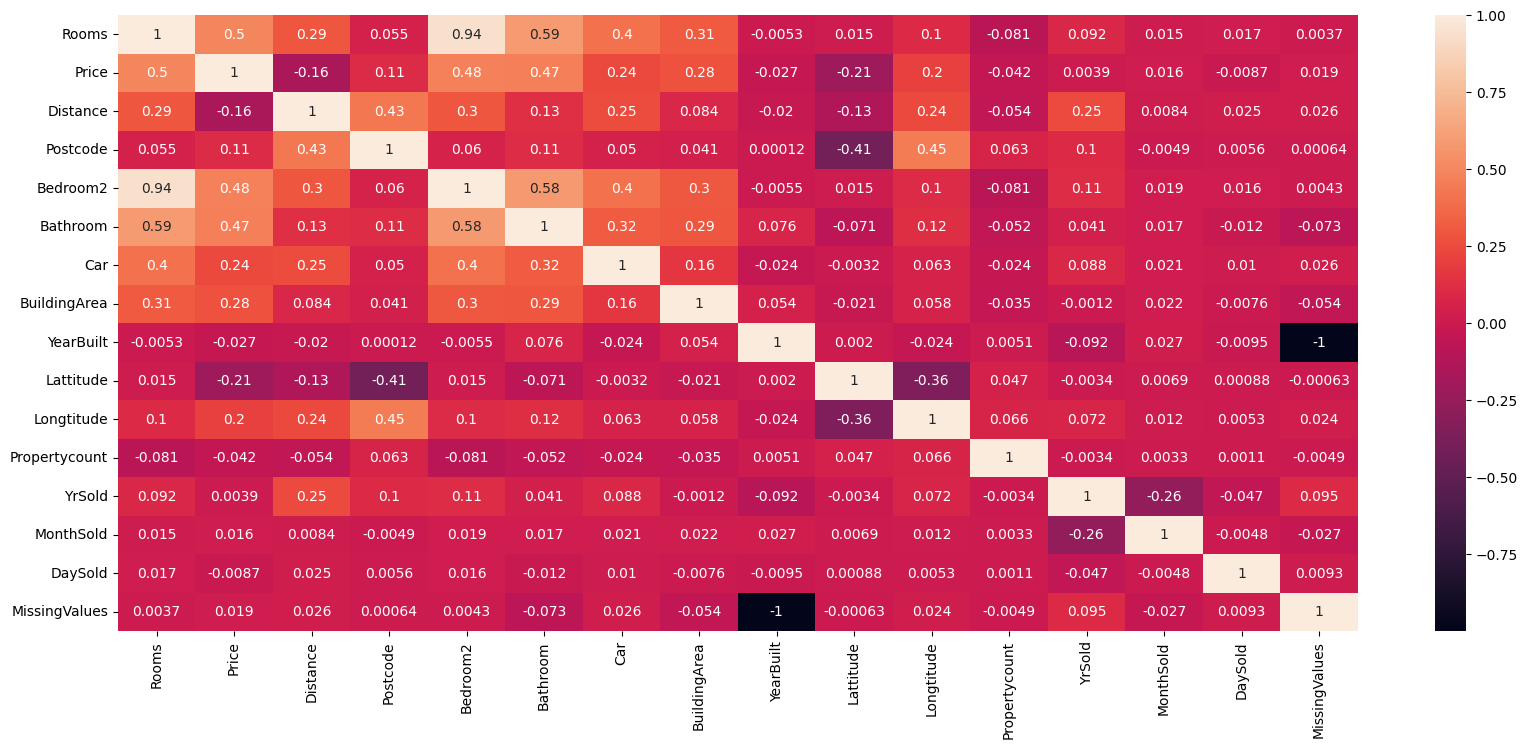

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

# I'm going to seperate the date and use Random Forest as my first model.

In [ ]:
df_tol = df_tol.sample(frac = 1)
df_test = df_tol[10000:]
df_train = df_tol[0:10000]
df_train

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Address Type,YrSold,MonthSold,DaySold,MissingValues
1641,22,4,0,2375000.0,1,17,9.0,3126.0,4.0,2.0,1.0,229.0,1910.0,2,-37.82920,145.08520,3,3265.0,20,2016,7,5,0
3353,48,4,0,1601000.0,1,25,7.9,3079.0,4.0,3.0,2.0,126.0,0.0,0,-37.76620,145.04000,0,5549.0,20,2016,3,12,0
9397,3,3,2,670000.0,1,35,11.0,3018.0,3.0,2.0,1.0,88.0,1988.0,10,-37.86066,144.82013,4,5301.0,7,2017,6,17,0
6935,34,3,0,631000.0,1,40,12.4,3060.0,3.0,2.0,2.0,133.0,2012.0,23,-37.69940,144.96860,1,5070.0,20,2016,9,24,0
58,1,2,2,462500.0,1,0,13.5,3042.0,2.0,1.0,1.0,126.0,2003.0,21,-37.72180,144.88630,4,3464.0,20,2016,7,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,19,4,0,1351000.0,1,17,11.8,3105.0,4.0,2.0,2.0,126.0,0.0,15,-37.77810,145.09010,0,4480.0,20,2016,5,28,0
13054,52,3,0,1000000.0,1,20,8.2,3041.0,3.0,1.0,2.0,149.0,1960.0,28,-37.71106,144.89427,4,389.0,6,2017,8,19,0
11366,52,4,0,945000.0,1,32,15.4,3131.0,4.0,2.0,2.0,194.0,2010.0,29,-37.85156,145.16923,0,4385.0,8,2017,7,15,0
5658,77,2,2,515000.0,4,20,3.3,3141.0,2.0,1.0,1.0,65.0,2013.0,26,-37.84330,144.99620,3,14887.0,20,2016,4,16,0


In [ ]:
X = df_train.drop("Price", axis = 1)
y = df_train.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(X_test, y_test)

0.7447041755315016

In [ ]:
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val, cross_val.mean()

(array([0.76075651, 0.76505015, 0.78157856, 0.6782728 , 0.74614176]),
 0.7463599545047194)

# It doesn't really gave us a higher r2_score

In [ ]:
y_preds = model.predict(X_test)
def analysis(X_test, y_test, y_preds):
  Regression_Report = {
      "R2_Score": model.score(X_test, y_test),
      "MAE": mean_absolute_error(y_test, y_preds),
      "RMSE": np.sqrt(mean_squared_error(y_test, y_preds)),
      "RMSLE": np.sqrt(mean_squared_log_error(y_test, y_preds))
  }
  return Regression_Report
report = analysis(X_test, y_test, y_preds)
report

# Tuning the Data using RandomizeSearchCV

In [ ]:
param_dis = {
    "n_estimators": np.arange(100, 1000, 100),
    "min_samples_split": np.arange(2, 8, 2),
    "min_samples_leaf":[1,2,4],
    "max_depth": np.arange(100, 500, 100)
}
param_clf = RandomizedSearchCV(model, param_distributions = param_dis, n_iter = 20, cv = 5, verbose = 0, n_jobs = -1)
param_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([100, 200, 300, 400]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': array([2, 4, 6]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [ ]:
model = param_clf.best_estimator_

# Checking if the model works better than before.

In [ ]:
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val, cross_val.mean()

(array([0.76438225, 0.77843371, 0.78996604, 0.68635734, 0.75213974]),
 0.7542558140194963)

In [ ]:
y_preds = model.predict(X_test)
report = analysis(X_test, y_test, y_preds)
report

{'R2_Score': 0.7450486477518603,
 'MAE': 187167.83985407653,
 'RMSE': 324412.17423651693,
 'RMSLE': 0.22409082328835014}

# Let's try the model on our test data if it will have a better analysis or it don't overfits.

In [ ]:
X_true = df_test.drop("Price", axis = 1)
y_true = df_test.Price

y_preds = model.predict(X_true)
report2 = analysis(X_true, y_true, y_preds)
report2

{'R2_Score': 0.7733180557181218,
 'MAE': 181792.36186788845,
 'RMSE': 298726.9285800627,
 'RMSLE': 0.21718659557995645}

In [ ]:
feature = model.feature_importances_

<Axes: title={'center': 'Features that contributes the most on our model'}, xlabel='Feature Name'>

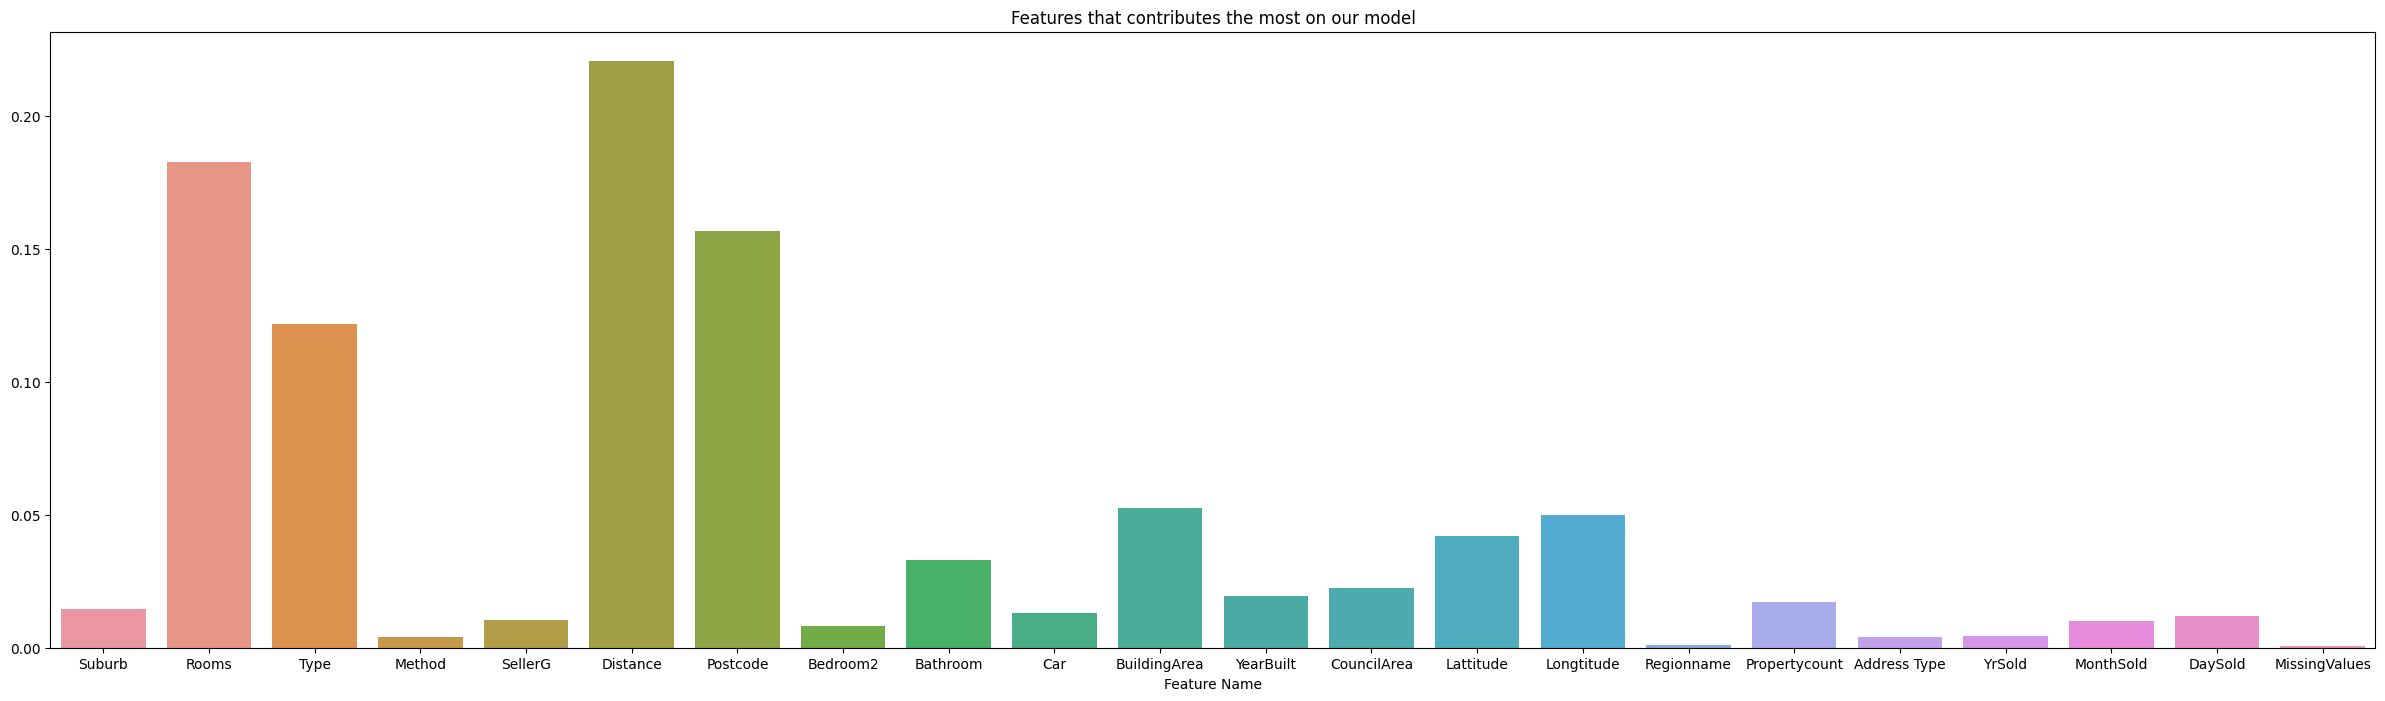

In [ ]:
col = X_train.columns
plt.figure(figsize = (30, 8))
plt.title("Features that contributes the most on our model")
plt.xlabel("Feature Name")
sns.barplot(x = col, y=feature)

# Using AdaBoostRegressor as my model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth = 100)
model = AdaBoostRegressor(base_estimator, n_estimators = 100, loss = "linear", learning_rate = 0.01)
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=100),
                  learning_rate=0.01, loss='square', n_estimators=100)

In [ ]:
cross_val = cross_val_score(model, X, y, cv =5)
cross_val, cross_val.mean()

(array([0.76043079, 0.76933329, 0.78043468, 0.66736416, 0.74437374]),
 0.7443873314419482)

In [ ]:
y_preds = model.predict(X_test)
report = analysis(X_test, y_test, y_preds)
report

{'R2_Score': 0.7305969945242117,
 'MAE': 185081.78733333334,
 'RMSE': 333479.930231149,
 'RMSLE': 0.22437633101580176}

# Fine Tune it now

In [ ]:
n_parameters = {
    "n_estimators": np.arange(100, 500, 100),
    "learning_rate": np.linspace(0.01, 0.1, 5),
    "loss": ["linear", "exponential", "sqaure"]
}
param_clf = RandomizedSearchCV(model, param_distributions=n_parameters, n_iter = 20, cv =5, verbose =0, n_jobs = -1)
param_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=100),
                                               learning_rate=0.01,
                                               loss='square',
                                               n_estimators=100),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                                        'loss': ['linear', 'exponential',
                                                 'sqaure'],
                                        'n_estimators': array([100, 200, 300, 400])})

In [ ]:
model = param_clf.best_estimator_
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=100),
                  learning_rate=0.01, n_estimators=100)

In [ ]:
cross_val = cross_val_score(model, X, y, cv =5)
cross_val, cross_val.mean()

(array([0.75303726, 0.76093287, 0.78208673, 0.6674586 , 0.74578615]),
 0.7418603244882025)

In [ ]:
y_preds = model.predict(X_test)
report = analysis(X_test, y_test, y_preds)
report

{'R2_Score': 0.7301580809656123,
 'MAE': 186741.405,
 'RMSE': 333751.4737776304,
 'RMSLE': 0.2256386555264377}

# Going to test it on the test data.

In [ ]:
y_preds = model.predict(X_true)
report = analysis(X_true, y_true, y_preds)
report

{'R2_Score': 0.7583979004247022,
 'MAE': 184134.59351411797,
 'RMSE': 308401.3433890229,
 'RMSLE': 0.22006752135474866}

<Axes: title={'center': 'Features that contributes the most on our model'}, xlabel='Feature Name'>

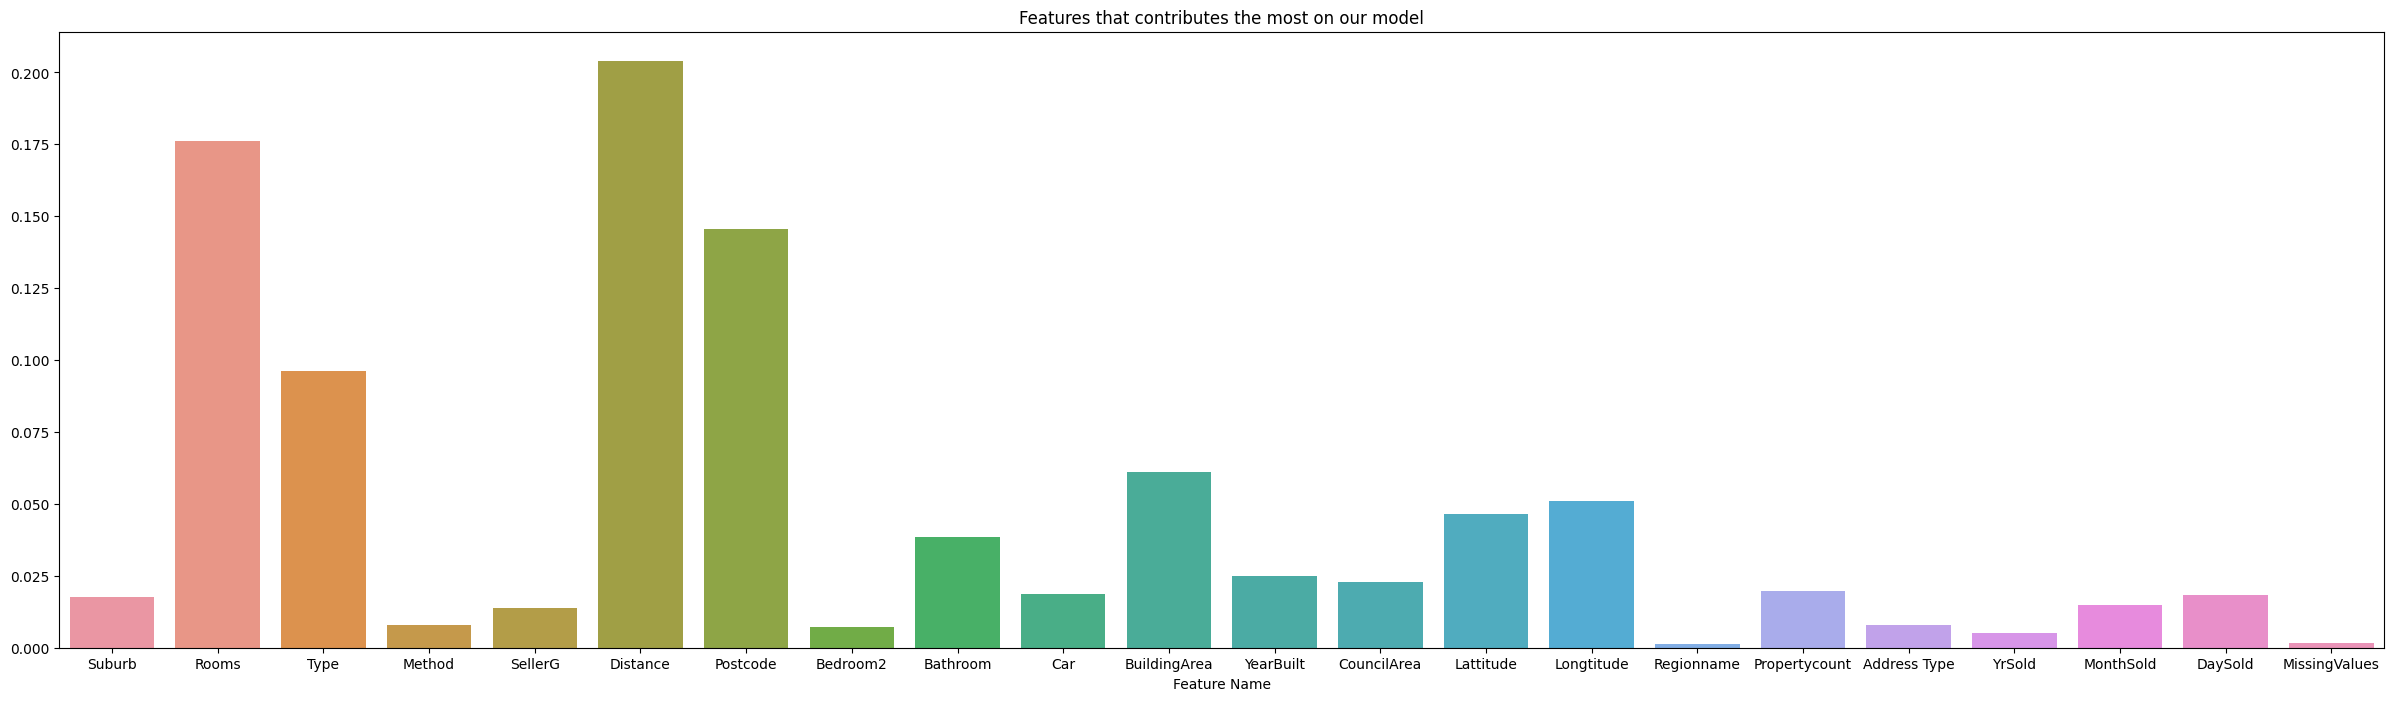

In [ ]:
feature = model.feature_importances_
col = X_train.columns
plt.figure(figsize = (30, 8))
plt.title("Features that contributes the most on our model")
plt.xlabel("Feature Name")
sns.barplot(x = col, y=feature)

# Therefore, the result is insignificant. The Random Forest Regressor has a much higher R-square with a 0.77 and a lower RMSLE of 0.22, while the Adaboost Classifier only has a 0.75 R-square and a 0.22 RMSLE.

# Now I'm going to examine if the deep learning works on the data. I'm gonna to build my ANN architectural model.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = torch.tensor(df_train.drop("Price", axis = 1).values).float()
y = torch.tensor(df_train.Price.values).float()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

# Creating my model

In [ ]:
from sklearn.metrics import r2_score
ANNmodel = nn.Sequential(
    nn.Linear(22, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 1),
)

lossfun = nn.MSELoss()
optimizer = torch.optim.Adam(ANNmodel.parameters(), lr = 0.001)

# Training the model

In [ ]:
numEpochs = 500
losses = torch.zeros(numEpochs)
all_r2 = []
for i in range(numEpochs):
  ANNmodel.train()
  optimizer.zero_grad()
  y_Hat = ANNmodel(X_train)
  loss = lossfun(y_Hat.reshape(-1), y_train)
  losses[i] = loss

  loss.backward()
  optimizer.step()



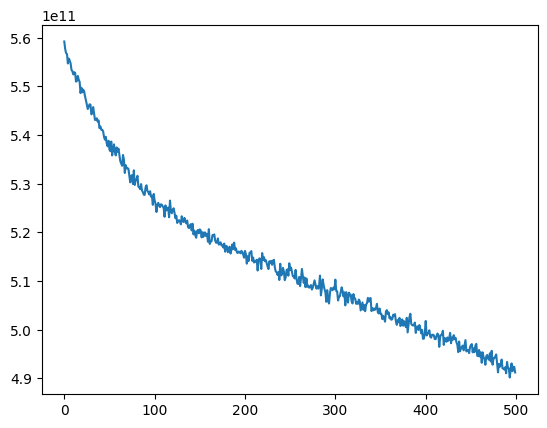

In [ ]:
plt.plot(losses.detach())

In [ ]:
y_preds = ANNmodel(X_val)

In [ ]:
r2_score(y_val, np.array(y_preds.reshape(-1).detach()))

-0.03083472403998977

# Therefore, We can conclude
 * It's better to use RandomForestRegressor if the features and labels don't have any linearity.
 * The Deep Learning will not work as and give you the accuracy that you desire.
